**1. Utilizando o data set iris (iris.csv em anexo ou usandoo sklearn):**

Exemplo de como fazer a importação do dataset usando o sklearn
from sklearn import datasets
iris = datasets.load_iris()

**Responda:**

a. Faça uma análise inicial sobre esse dataset

In [ ]:
import pandas as pd

# Load the dataset to perform an initial analysis
iris_df = pd.read_csv('iris.csv')
iris_df.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Estrutura dos Dados:**

**O dataset possui cinco colunas**

**Quatro colunas numéricas**

Sepal_Length: Comprimento da sépala.

Sepal_Width: Largura da sépala.

Petal_Length: Comprimento da pétala.

Petal_Width: Largura da pétala.

**Uma coluna categórica:**

Species: Espécie da planta (com valores como setosa, versicolor, e virginica).

**Exemplo de Observações:**

Cada linha representa uma observação (flor) com suas características morfológicas de sépala e pétala, além da espécie.


**b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.**

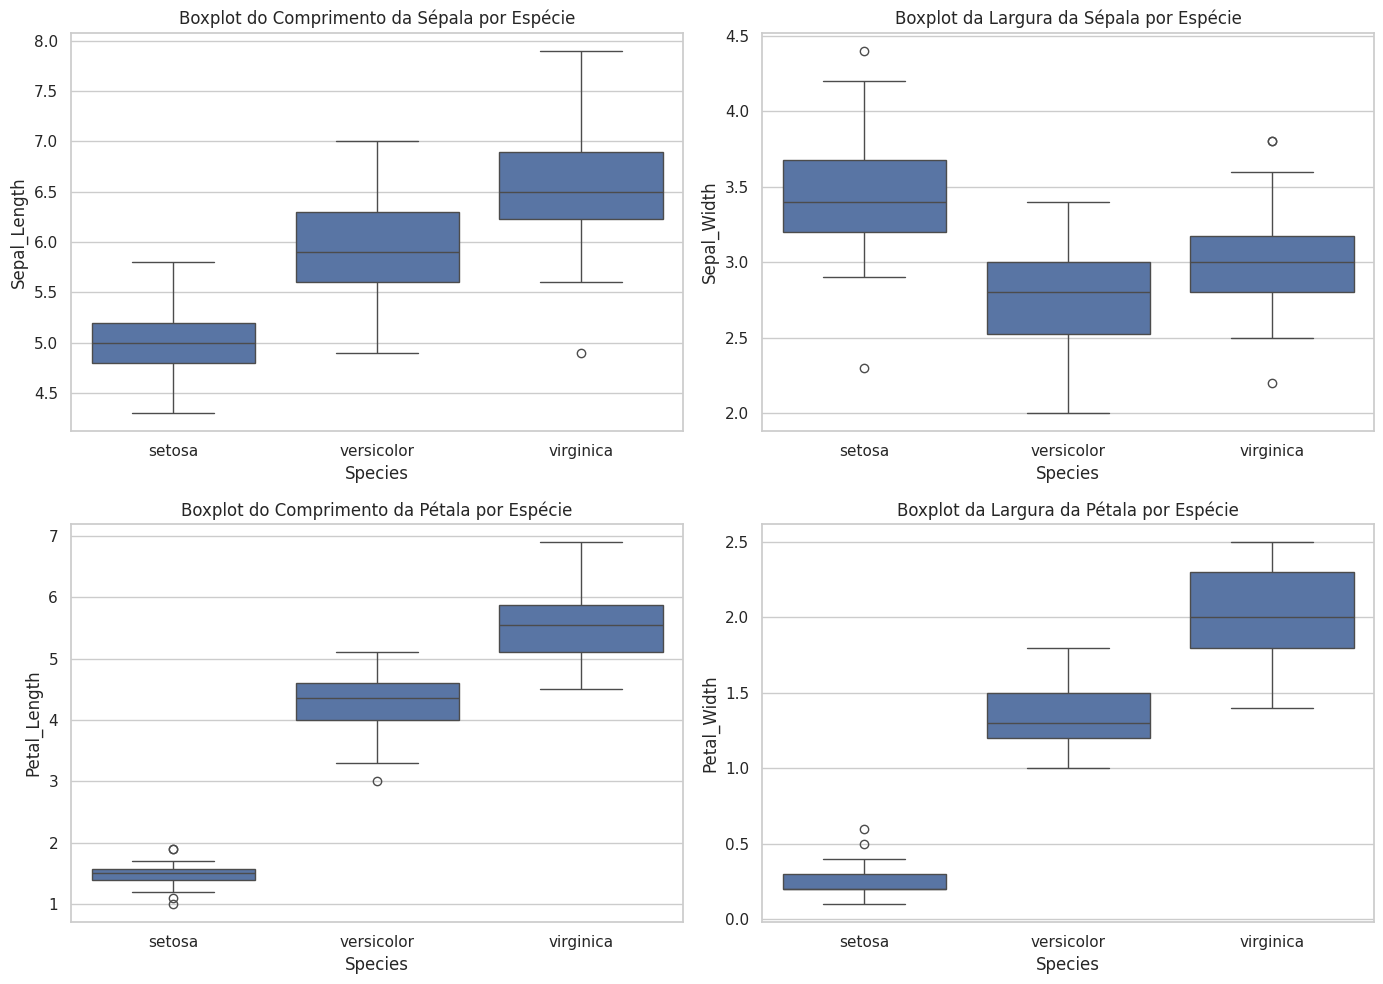

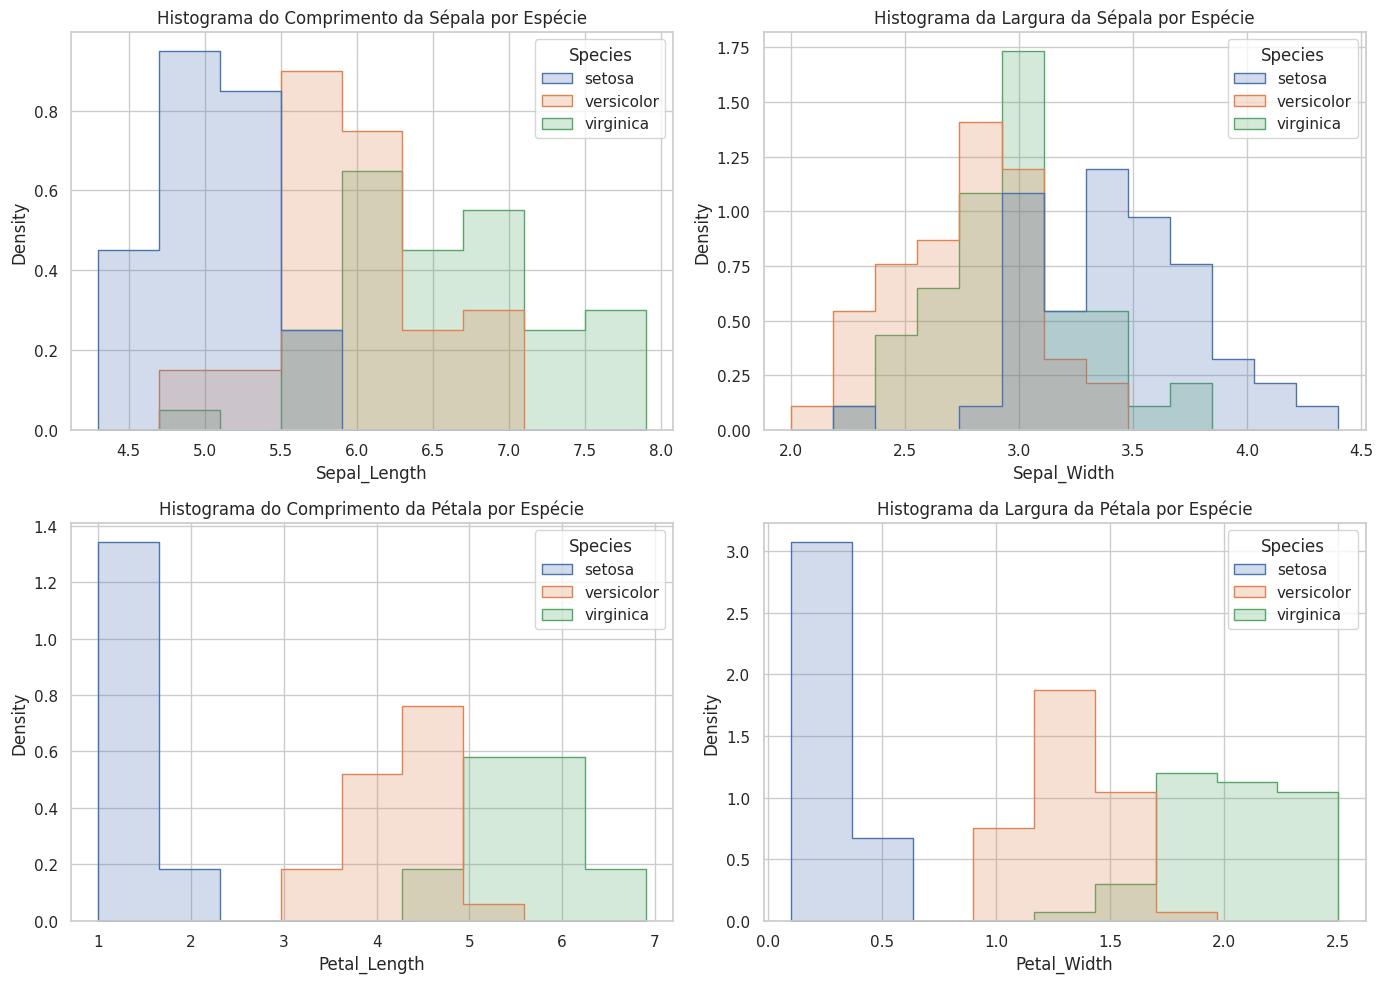

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais para exibição dos gráficos
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot para cada característica (distribuído por espécie)
sns.boxplot(x='Species', y='Sepal_Length', data=iris_df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot do Comprimento da Sépala por Espécie')

sns.boxplot(x='Species', y='Sepal_Width', data=iris_df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot da Largura da Sépala por Espécie')

sns.boxplot(x='Species', y='Petal_Length', data=iris_df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot do Comprimento da Pétala por Espécie')

sns.boxplot(x='Species', y='Petal_Width', data=iris_df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot da Largura da Pétala por Espécie')

plt.tight_layout()
plt.show()

# Histograma para cada característica (distribuído por espécie)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para Comprimento da Sépala
sns.histplot(data=iris_df, x='Sepal_Length', hue='Species', element='step', stat="density", common_norm=False, ax=axes[0, 0])
axes[0, 0].set_title('Histograma do Comprimento da Sépala por Espécie')

# Histograma para Largura da Sépala
sns.histplot(data=iris_df, x='Sepal_Width', hue='Species', element='step', stat="density", common_norm=False, ax=axes[0, 1])
axes[0, 1].set_title('Histograma da Largura da Sépala por Espécie')

# Histograma para Comprimento da Pétala
sns.histplot(data=iris_df, x='Petal_Length', hue='Species', element='step', stat="density", common_norm=False, ax=axes[1, 0])
axes[1, 0].set_title('Histograma do Comprimento da Pétala por Espécie')

# Histograma para Largura da Pétala
sns.histplot(data=iris_df, x='Petal_Width', hue='Species', element='step', stat="density", common_norm=False, ax=axes[1, 1])
axes[1, 1].set_title('Histograma da Largura da Pétala por Espécie')

plt.tight_layout()
plt.show()


**c. Somente olhando esses gráficos, é possível afirmar que uma ou mais
propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width)
são suficientes para distinguir as espécies?**


Sim, olhando os gráficos, Petal_Length e Petal_Width são suficientes para distinguir as espécies no dataset Iris:

**Petal_Length e Petal_Width** separam claramente setosa das outras espécies e diferenciam razoavelmente bem versicolor de virginica.


**Sepal_Length e Sepal_Width** não apresentam uma separação clara entre todas as espécies, tornando-as menos eficazes para distinção.

Portanto, Petal_Length e Petal_Width são as propriedades mais indicadas para identificar as espécies.

**d. Aplique a regressão logística para avaliar o modelo de
classificação.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separando as variáveis independentes (features) e a variável dependente (target)
X = iris_df[['Petal_Length', 'Petal_Width']]  # Usando as características mais discriminativas
y = iris_df['Species']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Regressão Logística
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


(0.8666666666666667,
 '              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        10\n  versicolor       1.00      0.56      0.71         9\n   virginica       0.73      1.00      0.85        11\n\n    accuracy                           0.87        30\n   macro avg       0.91      0.85      0.85        30\nweighted avg       0.90      0.87      0.86        30\n',
 array([[10,  0,  0],
        [ 0,  5,  4],
        [ 0,  0, 11]]))

**Relatório de Classificação:**

**Setosa:** Precisão e recall de 100%, indicando uma classificação perfeita para esta espécie.


**Versicolor:** Precisão de 100%, mas recall de 56%, o que indica que alguns exemplos de versicolor foram classificados incorretamente como outras espécies.


**Virginica:** Precisão de 73% e recall de 100%, sugerindo que todos os exemplos de virginica foram corretamente identificados, mas alguns outros exemplos foram classificados como virginica.

Aliás, a matriz mostra que setosa foi perfeitamente classificada. Versicolor teve 4 amostras incorretamente classificadas como virginica, e virginica teve todos os exemplos corretamente classificados.

**e. Calcule a acurácia, precisão e recall.**

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Cálculo das métricas de precisão e recall usando "macro" para avaliar o desempenho médio entre as classes
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Resultado das métricas solicitadas
accuracy, precision, recall


(0.8666666666666667, 0.9111111111111111, 0.8518518518518517)

**Acurácia:** 86.67%

**Precisão (macro)**: 91.11%

**Recall (macro)**: 85.19%

**f. Plote a matriz de confusão com matplotlib ou seaborn**

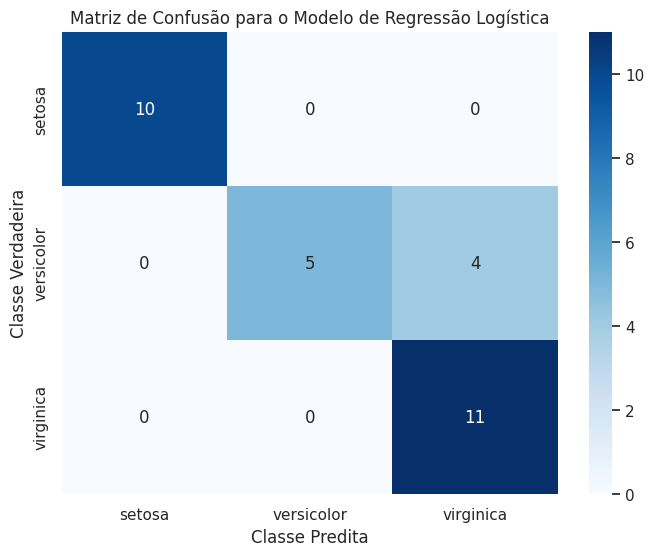

In [ ]:
# Plotando a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão para o Modelo de Regressão Logística")
plt.show()


**2. Utilizando o dataset load_digits. Exemplo de como fazer a
importação do dataset usando o sklearn:**

In [ ]:
from sklearn.datasets import load_digits

# Carregando o dataset digits
digits = load_digits()

# Examinando a estrutura do dataset
digits_data = digits.data  # Features (imagens em formato de vetor)
digits_target = digits.target  # Labels (dígitos reais)

# Visualizando as primeiras linhas das features e labels
digits_data[:5], digits_target[:5]


(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
         15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
         12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
          0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
         10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
          9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
         15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
          0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
         16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
         14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
          1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
          0.,  0.,  9., 16., 16.,  5.,  0.,  0

**a. Faça uma análise inicial sobre esse
dataset**

**1.797 amostras de imagens de dígitos (0-9)**, cada uma representada como um vetor de 64 pixels (8x8), com valores de intensidade de 0 a 16.

**Alvos:** Cada imagem corresponde a um dígito (0-9).

**Classes balanceadas:** Aproximadamente o mesmo número de imagens para cada dígito.

**i. Quantos dados possui?**

In [ ]:
# Verificando a quantidade de dados e estrutura do dataset
num_samples, num_features = digits_data.shape
num_samples, num_features


(1797, 64)

**ii. Existem dados nulos? Se sim quantos?**

In [ ]:
# Verificando se há dados nulos no dataset
null_values = (digits_data == 0).sum()  # Contando pixels com valor zero

# Verificação geral de valores nulos (embora valores zero aqui possam representar ausência de intensidade e não dados ausentes)
any_null_values = null_values.sum() == 0

any_null_values


False

**iii. Todos são dados numéricos ou existem colunas com dados
categóricos?**

No dataset digits, todos os dados são numéricos:


As features (64 pixels) têm valores numéricos entre 0 e 16, representando intensidades de cor.

O target (dígito representado) também é numérico, variando de 0 a 9.
Não existem colunas com dados categóricos, apenas valores numéricos.

**b. Aplique a regressão logística para construir e avaliar o modelo de
classificação.**


In [ ]:
# Importando os módulos necessários para criar e avaliar o modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividindo os dados em variáveis preditoras e variável alvo
X = digits.data  # features
y = digits.target  # target (label do dígito)

# Dividindo o dataset em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Regressão Logística
model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')  # Ajustes para garantir convergência
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


(0.975,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        33\n           1       0.97      1.00      0.98        28\n           2       1.00      1.00      1.00        33\n           3       0.97      0.97      0.97        34\n           4       1.00      0.98      0.99        46\n           5       0.92      0.96      0.94        47\n           6       0.97      0.97      0.97        35\n           7       1.00      0.97      0.99        34\n           8       0.97      0.97      0.97        30\n           9       0.97      0.95      0.96        40\n\n    accuracy                           0.97       360\n   macro avg       0.98      0.98      0.98       360\nweighted avg       0.98      0.97      0.98       360\n',
 array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
        [ 0, 

**c. Calcule a acurácia, precisão e recall com base no desempenho do modelo**

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Cálculo das métricas de precisão e recall usando "macro" para obter a média entre todas as classes
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Resultado das métricas solicitadas
accuracy, precision, recall


(0.975, 0.9766927036066416, 0.9764979386759329)

**d. Plote a matriz de confusão dos resultados do modelo utilizando matplotlib
ou seaborn.**

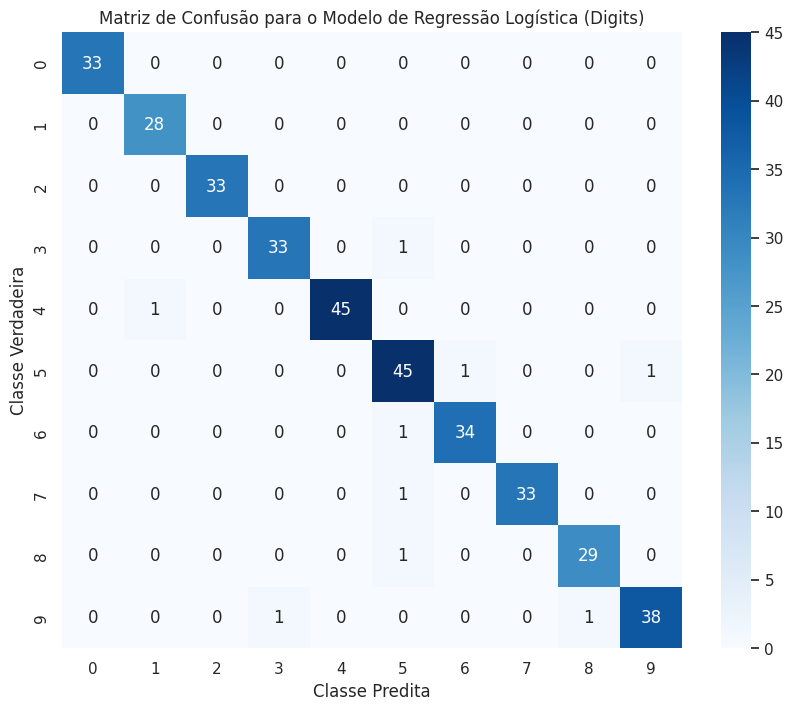

In [ ]:
# Reimportando as bibliotecas necessárias para plotagem
import matplotlib.pyplot as plt
import seaborn as sns

# Plotando a matriz de confusão usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão para o Modelo de Regressão Logística (Digits)")
plt.show()


**e. Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist  # Biblioteca para carregar o MNIST
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalizando os valores dos pixels
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Redimensionando as imagens para vetores
X_train_full = X_train_full.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Separando uma parte do conjunto de treino para validação (por exemplo, 20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [ ]:
# Configurando o modelo de regressão logística
model = LogisticRegression(max_iter=100, solver='saga', multi_class='multinomial')  # 'saga' é eficiente para dados grandes

# Treinando o modelo com o conjunto de treinamento
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga')

In [ ]:
# Fazendo previsões no conjunto de validação
y_pred = model.predict(X_val)

# Avaliando o modelo
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", classification_rep)


Acurácia: 0.9225
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.89      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.90      0.87      0.89      1160
           9       0.90      0.91      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



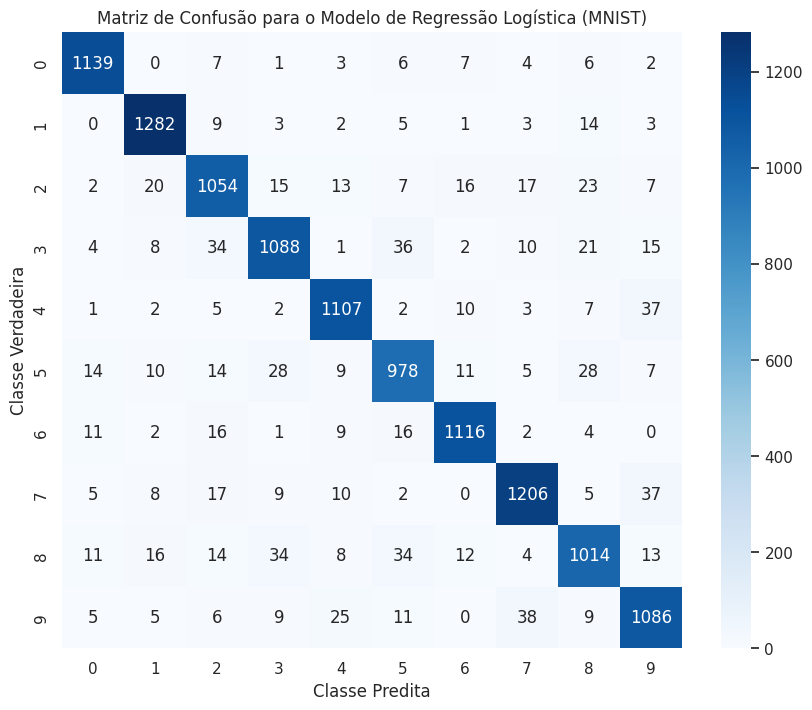

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão para o Modelo de Regressão Logística (MNIST)")
plt.show()


**f. Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Fazendo previsões no conjunto de validação
y_pred = model.predict(X_val)

# Calculando as métricas de avaliação
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print("Acurácia:", accuracy)
print("Precisão (macro):", precision)
print("Recall (macro):", recall)


Acurácia: 0.9225
Precisão (macro): 0.9217257626682581
Recall (macro): 0.9216886283997893


**g. Plote a matriz de confusão dos resultados da classificação dos dígitos de 0
a 9 utilizando matplotlib ou seaborn.**

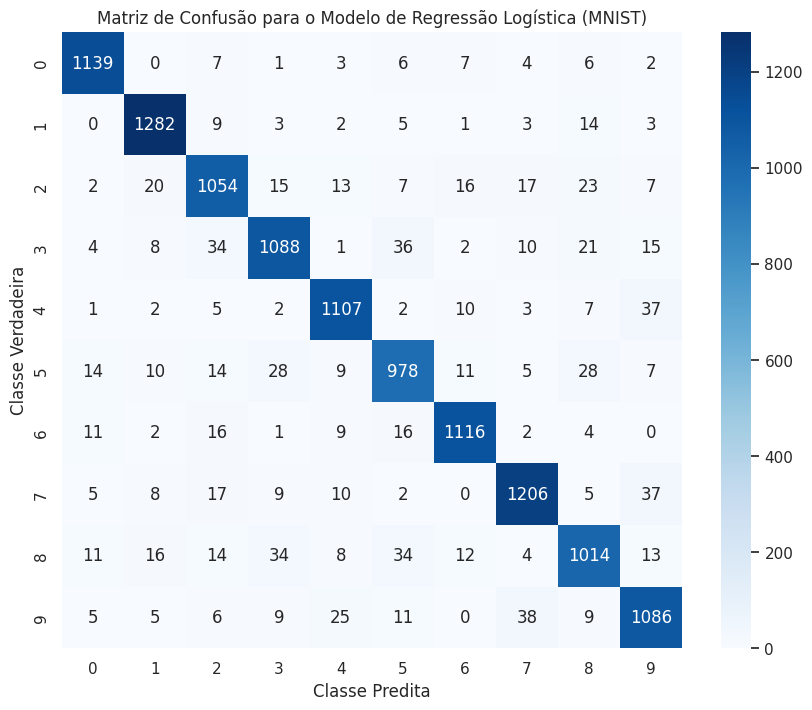

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerando a matriz de confusão com as previsões do modelo
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão para o Modelo de Regressão Logística (MNIST)")
plt.show()
